# EDA on 20230621

---

This script is used to do basic data analysis on in-situ measurements collected in Trondheimsfjorden, Norway

TODO: 
- Variogram analysis. 
- Visualise time series data. 

---

In [20]:
from WGS import WGS
import numpy as np
import pandas as pd
import os
from skgstat import Variogram
from datetime import datetime
from matplotlib.cm import get_cmap
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import plotly.graph_objects as go
from shapely.geometry import Polygon, Point
from matplotlib import tri

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 20

datapath = "csv/AUVData.csv"
figpath = "../../fig/OP1_MAFIA/"
os.listdir(figpath)
os.listdir("csv/")

plg = pd.read_csv("csv/polygon.csv").to_numpy()

In [21]:

data = pd.read_csv(datapath).to_numpy()
timestamp = data[:, 0]
lat = data[:, 1]
lon = data[:, 2]
depth = data[:, 3]
salinity = data[:, 4]
temperature = data[:, 5]


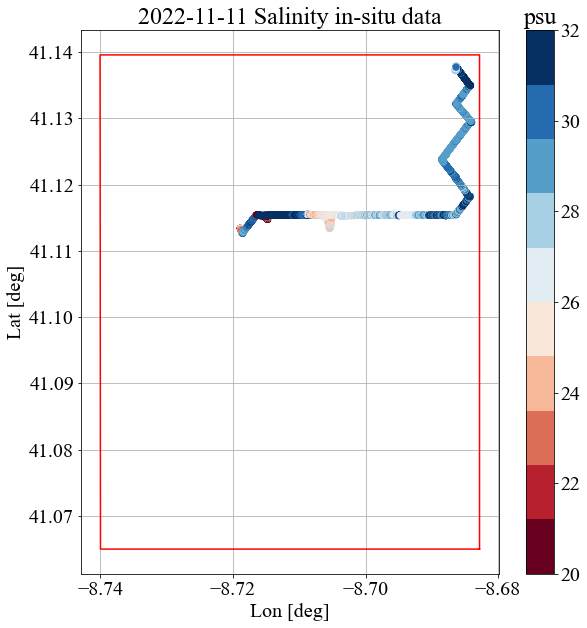

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(lon, lat, c=salinity, cmap=get_cmap("RdBu", 10), vmin=20, vmax=32)
plt.plot(plg[:, 1], plg[:, 0], 'r-')
plt.gca().set_aspect("equal")
cbar = plt.colorbar()
cbar.ax.set_title("psu")
plt.xlabel("Lon [deg]")
plt.ylabel("Lat [deg]")
plt.title("2022-11-11 Salinity in-situ data")
plt.grid()
plt.savefig(figpath + "scatter_salinity.png")

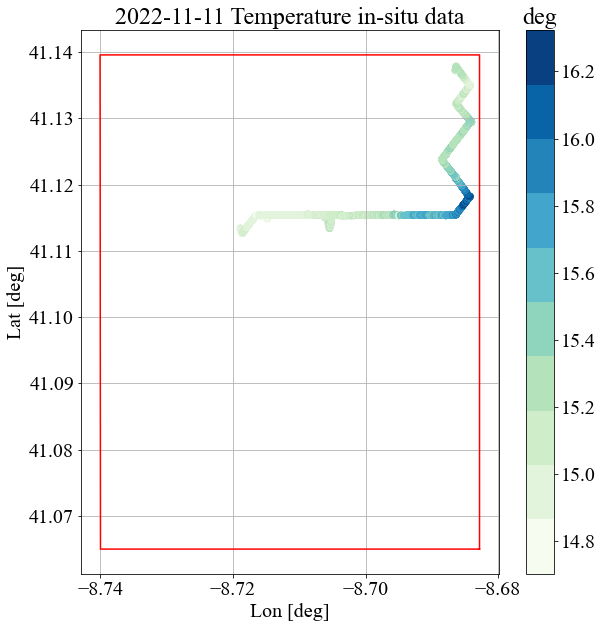

In [23]:
plt.figure(figsize=(10, 10))
plt.scatter(lon, lat, c=temperature, cmap=get_cmap("GnBu", 10))
plt.plot(plg[:, 1], plg[:, 0], 'r-')
plt.gca().set_aspect("equal")
cbar = plt.colorbar()
cbar.ax.set_title("deg")
plt.xlabel("Lon [deg]")
plt.ylabel("Lat [deg]")
plt.title("2022-11-11 Temperature in-situ data")
plt.grid()
plt.savefig(figpath + "scatter_temp.png")

# Section I: variogram analysis

/usr/local/lib/python3.9/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


spherical Variogram
-------------------
Estimator:         matheron
        
Effective Range:   3898.54
        
Sill:              5.89
        
Nugget:            2.82
        


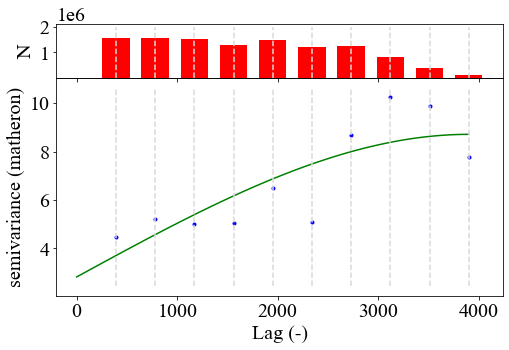

In [18]:
residuals = salinity - np.mean(salinity)
x, y = WGS.latlon2xy(lat, lon)
v = Variogram(coordinates=np.stack((x, y), axis=1), values=residuals, use_nugget=True, n_lags=10, maxlag=10000)
v.plot()
print(v)

# Section II: time series analysis

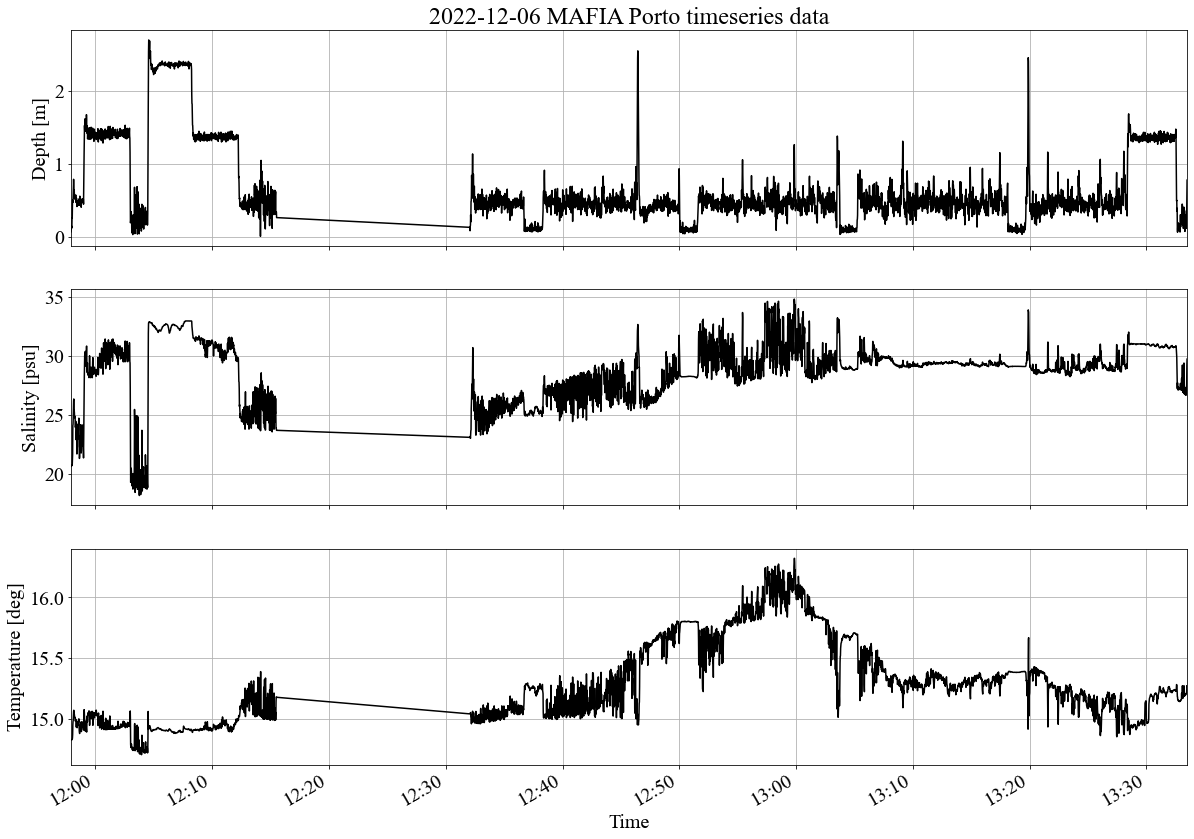

In [24]:
tf = np.vectorize(datetime.fromtimestamp)
tid = tf(timestamp)
tid_str = tid

fig = plt.figure(figsize=(20, 15))
gs = GridSpec(nrows=3, ncols=1)
ax = fig.add_subplot(gs[0])
ax.plot(tid_str, depth, 'k-')
ax.set_xlim([tid_str[0], tid_str[-1]])
ax.set_ylabel("Depth [m]")
ax.set_title("2022-12-06 MAFIA Porto timeseries data")
ax.grid()

ax = fig.add_subplot(gs[1])
ax.plot(tid_str, salinity, 'k-')
ax.set_xlim([tid_str[0], tid_str[-1]])
ax.set_ylabel("Salinity [psu]")
ax.grid()

ax = fig.add_subplot(gs[2])
ax.plot(tid_str, temperature, 'k-')
ax.set_xlim([tid_str[0], tid_str[-1]])
ax.set_ylabel("Temperature [deg]")
ax.set_xlabel("Time")
ax.grid()
# rotate and align the tick labels so they look better
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()
plt.savefig(figpath + "Timeseries_20221206_MAFIA_Porto.pdf")
plt.show()